<a href="https://colab.research.google.com/github/Indiranafa/Machine-Learning/blob/main/TG_11_2341720001_INDIRA_NAFA_AURAH_HUDA_KLASIFIKASI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#PRAKTIKUM 1 (Klasifikasi SVM dengan Data Dummy Linier)

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

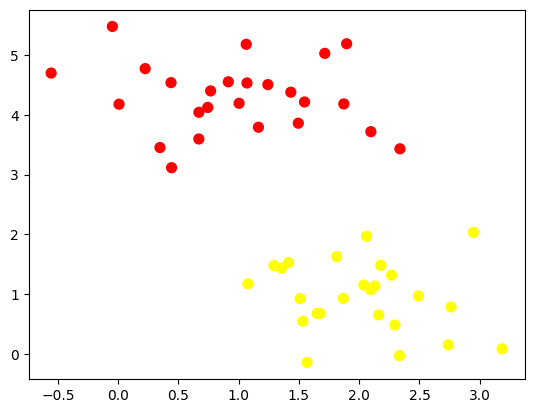

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


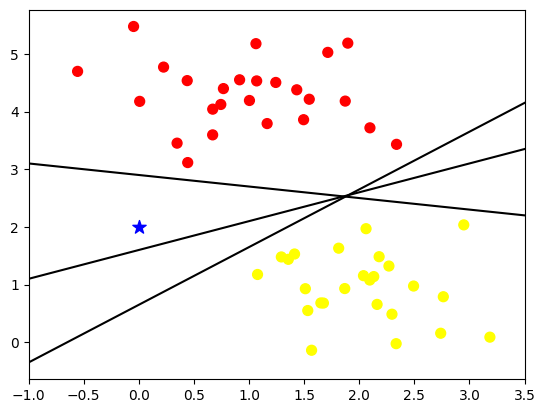

In [ ]:
# Menampilkan titik data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Menampilkan titik baru
x_new = np.array([0, 2])
plt.scatter(x_new[0], x_new[1], c='blue', s=100, marker='*')

# Menampilkan beberapa kemungkinan garis pemisah
xfit = np.linspace(-1, 3.5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

(-1.0, 3.5)

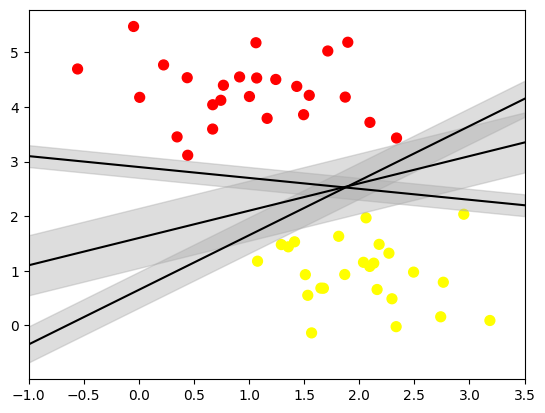

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

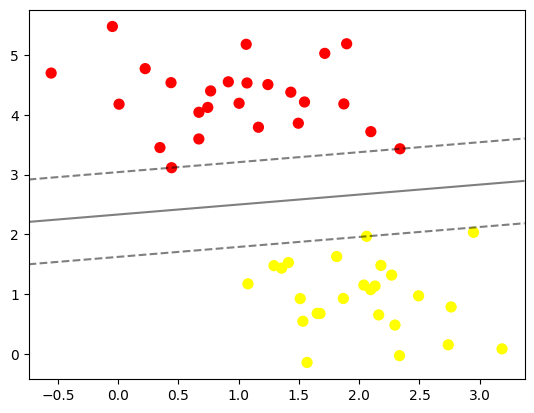

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

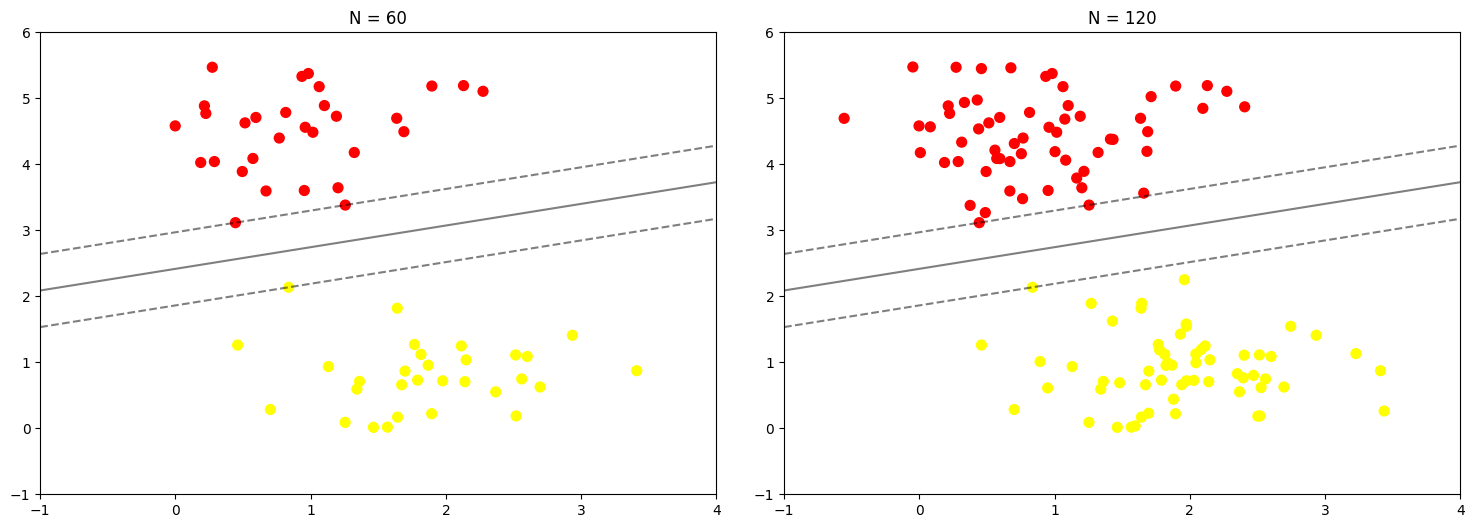

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

#PRAKTIKUM 2 (Klasifikasi SVM dengan Data Dummy Non-Linier)

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

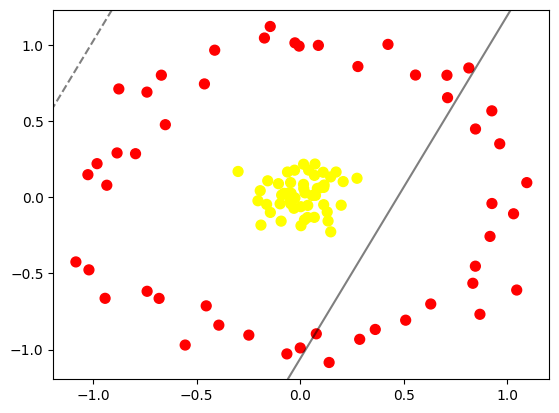

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1]
    , c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.92205798e-01, -8.39308414e-01],
       [ 7.81969024e-02, -8.96242788e-01],
       [ 1.40080851e-01, -1.08446243e+00],
       [ 1.73667757e-01,  1.66455078e-01],
       [ 7.41618304e-02,  1.32016513e-02],
       [-9.80025966e-01,  2.21331614e-01],
       [-1.61597201e-01, -4.60698977e-02],
       [-4.49045014e-02, -4.23702219e-02],
       [ 3.30068443e-03, -6.13000346e-02],
       [ 1.98325313e-01, -5.15302162e-02],
       [-1.02423367e+00,  1.48988262e-01],
       [-4.70442181e-03,  9.93330596e-01],
       [ 1.30796437e-01, -9.57692226e-02],
       [ 9.71535775e-02,  6.31927161e-02],
       [ 6.93144133e-02,  1.44448932e-01],
       [-7.39177295e-01,  6.91228507e-01],
       [-1.08218103e+00, -4.24015100e-01],
       [-4.59020359e-02,  9.69378752e-02],
       [-1.01917486e+00, -4.76130020e-01],
       [ 3.62825308e-01, -8.67521970e-01],
       [ 2.87644161e-01, -9.32327676e-01],
       [-4.71910237e-02, -2.38211754e-02],
       [-7.94308524e-01,  2.86752577e-01],
       [-4.53109790e-01, -7.12570572e-01],
       [-4.12170748e-01,  9.66556730e-01],
       [ 1.47416128e-01,  1.34166368e-01],
       [-6.69677821e-01,  8.02461457e-01],
       [-2.99356963e-01,  1.70111909e-01],
       [-2.67670846e-02,  1.78535558e-01],
       [-6.07808019e-02,  1.66460599e-01],
       [-1.56194014e-01,  1.08745602e-01],
       [-8.74904708e-01,  7.12089008e-01],
       [-2.03388903e-01, -2.23319349e-02],
       [-1.72133811e-01,  1.04654019e+00],
       [ 4.19073170e-03, -1.86170264e-01],
       [-1.44201761e-01,  1.12232761e+00],
       [-9.64896795e-02, -4.24151179e-02],
       [-6.80538536e-01, -6.63659145e-01],
       [ 1.47943191e-01, -2.26435123e-01],
       [ 8.81581415e-02,  9.98194573e-01],
       [ 9.63598005e-01,  3.51636164e-01],
       [ 8.14433653e-01,  8.49815343e-01],
       [ 4.24212522e-01,  1.00469113e+00],
       [-9.15839895e-02, -1.56251343e-01],
       [ 9.26017266e-01, -4.03996673e-02],
       [-2.47457332e-01, -9.04829760e-01],
       [ 7.11758555e-01,  6.54600514e-01],
       [ 2.07925161e-01,  1.03570426e-01],
       [ 8.31856346e-02,  5.83753523e-02],
       [ 6.30635112e-01, -7.00401177e-01],
       [ 1.68955531e-02,  2.17477547e-01],
       [ 2.09653730e-02, -1.47709745e-01],
       [ 7.08802525e-01,  8.01848597e-01],
       [ 3.68956231e-02, -5.26820703e-02],
       [ 2.36945618e-02,  2.96563547e-02],
       [-9.32974945e-01,  7.96212979e-02],
       [ 1.14036039e-01,  6.54860747e-02],
       [ 2.78989361e-01,  8.59292529e-01],
       [ 1.35000957e-01, -1.55165550e-01],
       [-5.40141059e-02,  2.94927362e-02],
       [-7.38403044e-01, -6.16901335e-01],
       [ 9.16676512e-01, -2.56495780e-01],
       [ 7.18971087e-02,  2.18867452e-01],
       [-1.92466248e-01,  4.37216716e-02],
       [ 1.76046411e-02,  5.77881229e-02],
       [-7.77770116e-02,  2.64169691e-02],
       [ 1.65423765e-02,  8.51533403e-02],
       [-1.43610586e-01, -9.88929059e-02],
       [ 1.11421668e-01,  1.64831265e-01],
       [-4.61783006e-01,  7.45105690e-01],
       [ 5.85383284e-02,  1.25569418e-02],
       [-1.04436584e-01,  8.98099291e-02],
       [ 1.04559421e+00, -6.08675274e-01],
       [-2.49267957e-02,  1.01474535e+00],
       [ 4.11706096e-02,  1.78984535e-01],
       [ 8.46079740e-01, -4.52037114e-01],
       [ 1.03037436e+00, -1.07877779e-01],
       [-8.90027644e-02,  1.53088643e-02],
       [-2.48988806e-02, -3.60283832e-03],
       [-6.37808818e-02, -1.02819077e+00],
       [-6.50447625e-01,  4.77344635e-01],
       [-9.41223291e-01, -6.63032430e-01],
       [ 6.86536595e-02, -1.31300444e-01],
       [ 3.57446899e-02, -1.32184550e-01],
       [-5.54668558e-01, -9.69926863e-01],
       [ 8.46671055e-01,  4.49002526e-01],
       [ 5.57064965e-01,  8.03379407e-01],
       [ 7.65630309e-04, -9.88982512e-01],
       [-1.88936842e-01, -1.82096292e-01],
       [ 1.13827818e-01, -4.82423516e-02],
       [ 1.16015243e-01,  8.09210974e-02],
       [ 5.09598177e-01, -8.06745772e-01

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

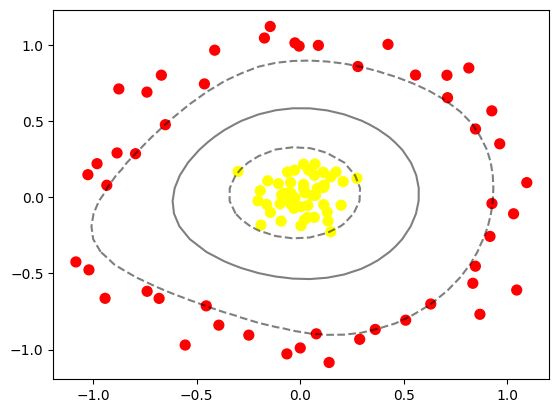

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#PRAKTIKUM 3 (SVM Data Overlapping)

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

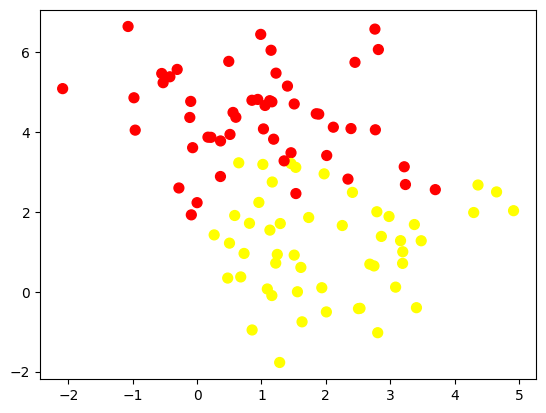

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

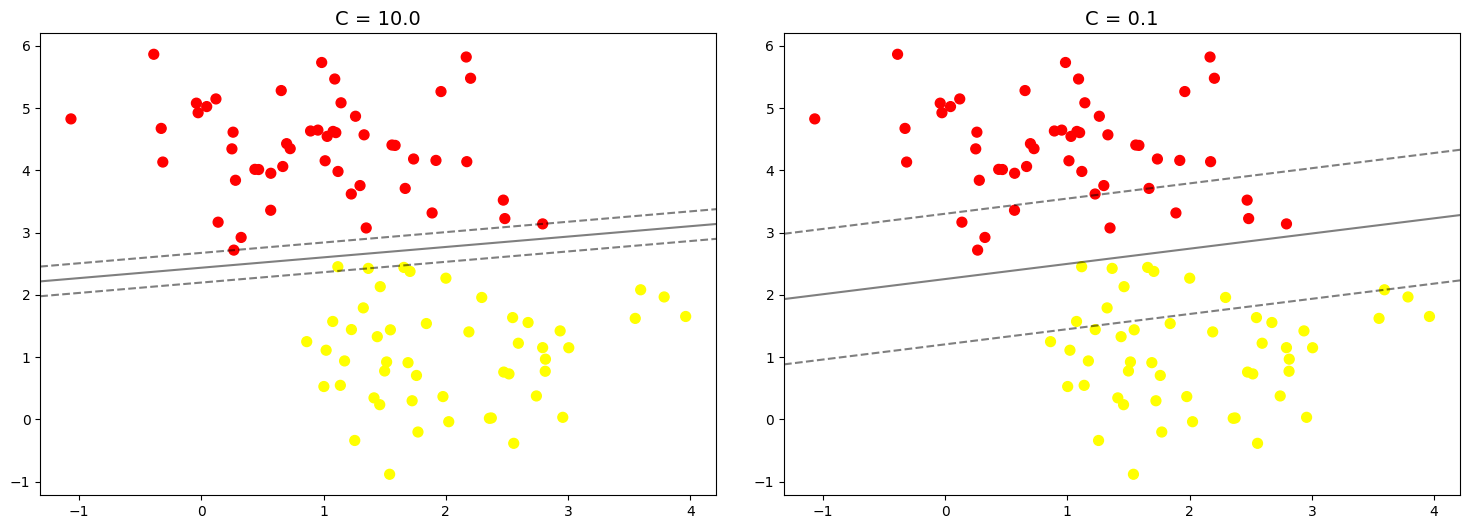

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#PRAKTKUM 4 (Klasifikasi Citra Wajah)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


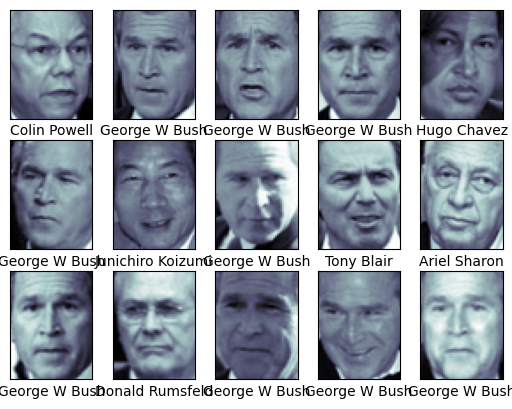

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 6s, sys: 87.7 ms, total: 2min 6s
Wall time: 1min 22s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

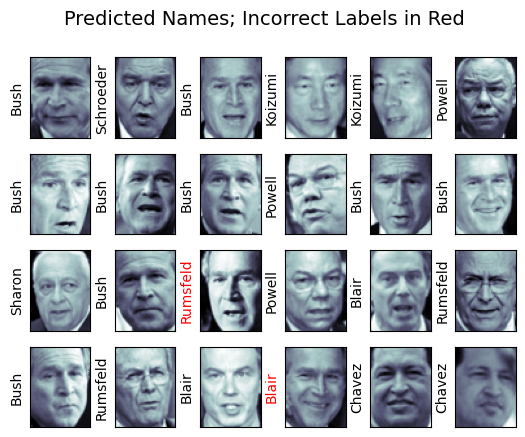

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

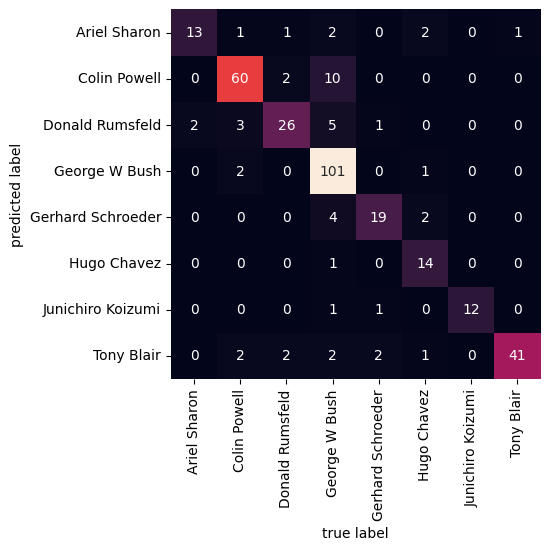

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#PRAKTIKUM (Klasifikasi Citra Siang dan Malang)

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Kebutuhan smt 5/images/images/training/"
test_dir = "/content/drive/MyDrive/Kebutuhan smt 5/images/images/test/"

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[79, 78, 73],
         [77, 76, 71],
         [74, 73, 69],
         ...,
         [63, 61, 62],
         [71, 69, 70],
         [75, 73, 74]],
 
        [[78, 77, 72],
         [76, 75, 70],
         [73, 72, 68],
         ...,
         [54, 52, 53],
         [56, 54, 55],
         [57, 55, 56]],
 
        [[77, 76, 71],
         [74, 73, 68],
         [71, 70, 66],
         ...,
         [49, 47, 48],
         [46, 44, 45],
         [44, 42, 43]],
 
        ...,
 
        [[93, 83, 73],
         [93, 83, 73],
         [93, 83, 73],
         ...,
         [71, 57, 48],
         [71, 57, 48],
         [71, 57, 48]],
 
        [[93, 83, 74],
         [93, 83, 74],
         [93, 83, 74],
         ...,
         [71, 57, 48],
         [71, 57, 46],
         [71, 57, 46]],
 
        [[92, 82, 73],
         [92, 82, 73],
         [92, 82, 73],
         ...,
         [71, 57, 48],
         [71, 57, 46],
         [71, 57, 46]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 93
(889, 1280, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (458, 800, 3)
Label	: night


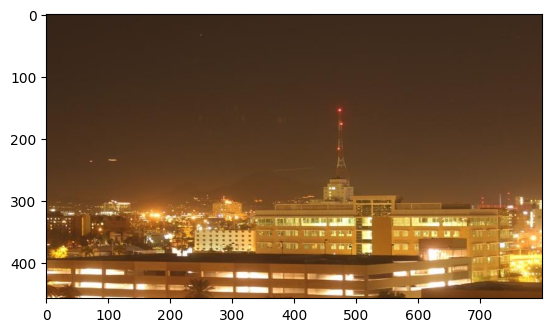

In [ ]:
random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 199
(600, 1100, 3)


In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 36
Avg Brighness: 102.3549


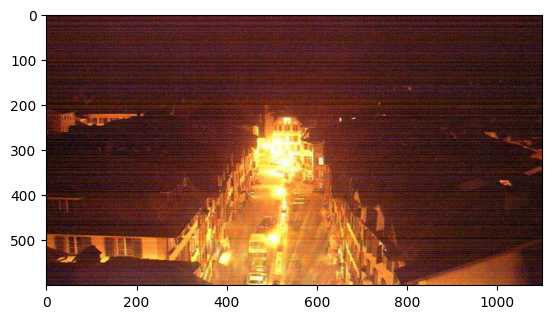

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 106
Actual label: 0
Predicted label: 0


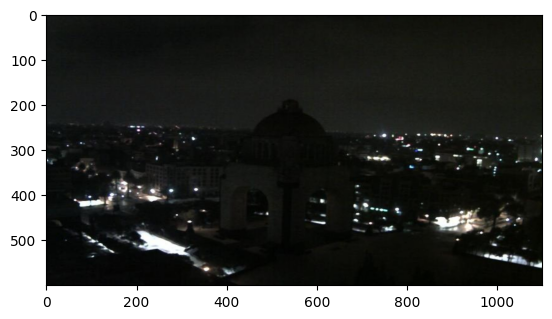

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,98.982730,0.0
1,94.019297,0.0
2,47.273102,0.0
3,91.782092,0.0
4,27.900359,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.300176,0.0
1,53.467780,0.0
2,32.609429,0.0
3,47.079873,0.0
4,21.545995,0.0


In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


#TUGAS PPRAKTIKUM

Bagian 1 - Klasifikasi Dataset voice.csv

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/voice.csv')
print(df.head())
print(df.info())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [ ]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Encode label: male/female -> 0/1
le = LabelEncoder()
y = le.fit_transform(y)

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def evaluate_svm(X, y, test_size, kernel):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [ ]:
ratios = [0.3, 0.2]  # 70:30 dan 80:20
kernels = ['linear', 'poly', 'rbf']
results = []

for r in ratios:
    for k in kernels:
        acc = evaluate_svm(X_scaled, y, test_size=r, kernel=k)
        results.append({
            'Split': f'{int((1-r)*100)}:{int(r*100)}',
            'Kernel': k,
            'Accuracy': round(acc, 4)
        })

# Tampilkan hasil dalam tabel
result_df = pd.DataFrame(results)
print(result_df)

   Split  Kernel  Accuracy
0  70:30  linear    0.9706
1  70:30    poly    0.9569
2  70:30     rbf    0.9811
3  80:20  linear    0.9763
4  80:20    poly    0.9685
5  80:20     rbf    0.9826


Bagian 2 - Import Library dan Load Data

In [ ]:
from pathlib import Path
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Path dataset
train_dir = '/content/drive/MyDrive/Kebutuhan smt 5/images/images/training/'
test_dir = '/content/drive/MyDrive/Kebutuhan smt 5/images/images/test/'

# Fungsi untuk memuat dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

data = load_dataset(train_dir)

In [ ]:
def standarized_input(image):
    return cv2.resize(image, (1100, 600))

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    result = []
    for img, label in img_list:
        std_img = standarized_input(img)
        lbl = label_encoder(label)
        result.append((std_img, lbl))
    return result

data_std = preprocess(data)

In [ ]:
def histogram_feature(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([gray], [0], None, [32], [0, 256])  # 32 bin histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

features = []
labels = []
for img, lbl in data_std:
    features.append(histogram_feature(img))
    labels.append(lbl)

X = np.array(features)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]

best_acc = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'C={C}, gamma={gamma}, acc={acc:.4f}')
        if acc > best_acc:
            best_acc = acc
            best_params = {'C': C, 'gamma': gamma}

print('\nBest Result:')
print(f'Best Accuracy: {best_acc:.4f}')
print(f'Best Parameters: {best_params}')

C=0.1, gamma=0.001, acc=0.9583
C=0.1, gamma=0.01, acc=0.9583
C=0.1, gamma=0.1, acc=0.9583
C=0.1, gamma=1, acc=1.0000
C=1, gamma=0.001, acc=0.9583
C=1, gamma=0.01, acc=0.9583
C=1, gamma=0.1, acc=0.9583
C=1, gamma=1, acc=1.0000
C=10, gamma=0.001, acc=0.9583
C=10, gamma=0.01, acc=0.9583
C=10, gamma=0.1, acc=1.0000
C=10, gamma=1, acc=1.0000
C=100, gamma=0.001, acc=0.9583
C=100, gamma=0.01, acc=1.0000
C=100, gamma=0.1, acc=1.0000
C=100, gamma=1, acc=1.0000

Best Result:
Best Accuracy: 1.0000
Best Parameters: {'C': 0.1, 'gamma': 1}
